# French Motors Insurance Climes Classification

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
# Ignore harmless warnings 
warnings.filterwarnings("ignore")


In [3]:
#Load the Data Sets
ds1=pd.read_csv(r"C:\Users\eswar\OneDrive\Desktop\Internship-AIMLDS\Project\freMTPL2freq.csv")
ds2=pd.read_csv(r"C:\Users\eswar\OneDrive\Desktop\Internship-AIMLDS\Project\freMTPL2sev.csv")


In [4]:
#Display the First DataSet
ds1

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10000,D,5,0,55,50,B12,Regular,1217,R82
1,3.0,1,0.77000,D,5,0,55,50,B12,Regular,1217,R82
2,5.0,1,0.75000,B,6,2,52,50,B12,Diesel,54,R22
3,10.0,1,0.09000,B,7,0,46,50,B12,Diesel,76,R72
4,11.0,1,0.84000,B,7,0,46,50,B12,Diesel,76,R72
...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326.0,0,0.00274,E,4,0,54,50,B12,Regular,3317,R93
678009,6114327.0,0,0.00274,E,4,0,41,95,B12,Regular,9850,R11
678010,6114328.0,0,0.00274,D,6,2,45,50,B12,Diesel,1323,R82
678011,6114329.0,0,0.00274,B,4,0,60,50,B12,Regular,95,R26


In [5]:
#Display the Second DataSet
ds2

,IDpol,ClaimAmount
0,1552,995.20
1,1010996,1128.12
2,4024277,1851.11
3,4007252,1204.00
4,4046424,1204.00
...,...,...
26634,3254353,1200.00
26635,3254353,1800.00
26636,3254353,1000.00
26637,2222064,767.55


In [6]:
#Merge the Both DataSets
df = ds2.merge(ds1,how='right')
df

,IDpol,ClaimAmount,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1,NaN,1,0.10000,D,5,0,55,50,B12,Regular,1217,R82
1,3,NaN,1,0.77000,D,5,0,55,50,B12,Regular,1217,R82
2,5,NaN,1,0.75000,B,6,2,52,50,B12,Diesel,54,R22
3,10,NaN,1,0.09000,B,7,0,46,50,B12,Diesel,76,R72
4,11,NaN,1,0.84000,B,7,0,46,50,B12,Diesel,76,R72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679508,6114326,NaN,0,0.00274,E,4,0,54,50,B12,Regular,3317,R93
679509,6114327,NaN,0,0.00274,E,4,0,41,95,B12,Regular,9850,R11
679510,6114328,NaN,0,0.00274,D,6,2,45,50,B12,Diesel,1323,R82
679511,6114329,NaN,0,0.00274,B,4,0,60,50,B12,Regular,95,R26


In [7]:
#Fill the NaN Values
df=df.fillna(0)

In [8]:
df['ClaimAmount'].value_counts()

0.00       653069
1204.00      4792
1128.12      3056
1172.00      2071
1128.00       831
            ...  
1348.00         1
2335.38         1
2792.83         1
506.15          1
311.71          1
Name: ClaimAmount, Length: 12256, dtype: int64

In [9]:
#Change the DataType
df['ClaimAmount']=df['ClaimAmount'].astype(int)

In [10]:
df

,IDpol,ClaimAmount,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1,0,1,0.10000,D,5,0,55,50,B12,Regular,1217,R82
1,3,0,1,0.77000,D,5,0,55,50,B12,Regular,1217,R82
2,5,0,1,0.75000,B,6,2,52,50,B12,Diesel,54,R22
3,10,0,1,0.09000,B,7,0,46,50,B12,Diesel,76,R72
4,11,0,1,0.84000,B,7,0,46,50,B12,Diesel,76,R72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679508,6114326,0,0,0.00274,E,4,0,54,50,B12,Regular,3317,R93
679509,6114327,0,0,0.00274,E,4,0,41,95,B12,Regular,9850,R11
679510,6114328,0,0,0.00274,D,6,2,45,50,B12,Diesel,1323,R82
679511,6114329,0,0,0.00274,B,4,0,60,50,B12,Regular,95,R26


In [11]:
#Create an Empty List
#Append the Values as 0&1 to the list
l=[]
for i in df['ClaimAmount']:
    if i==0:
        l.append(0)
    else:
        l.append(1)

In [12]:
#convert into dataset
ds=pd.DataFrame({'Claimed_Not':l})

In [13]:
ds['IDpol']=df['IDpol']

In [14]:
#Merge the DataSets
df=df.merge(ds,how='right')

In [15]:
#Save the Dataset into your System
df.to_csv(r"C:\Users\eswar\OneDrive\Desktop\Internship-AIMLDS\Project\French_Motor_Data.csv")


In [16]:
#Copy the Backup file
DataBk=df

In [17]:
#Check the Duplicates in the DataSet
df.duplicated().sum()

3951

In [18]:
#Remove the Duplicates in the Dataset
df=df.drop_duplicates()

In [19]:
df=pd.DataFrame(df)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679248 entries, 0 to 683198
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   IDpol        679248 non-null  int64  
 1   ClaimAmount  679248 non-null  int32  
 2   ClaimNb      679248 non-null  int64  
 3   Exposure     679248 non-null  float64
 4   Area         679248 non-null  object 
 5   VehPower     679248 non-null  int64  
 6   VehAge       679248 non-null  int64  
 7   DrivAge      679248 non-null  int64  
 8   BonusMalus   679248 non-null  int64  
 9   VehBrand     679248 non-null  object 
 10  VehGas       679248 non-null  object 
 11  Density      679248 non-null  int64  
 12  Region       679248 non-null  object 
 13  Claimed_Not  679248 non-null  int64  
dtypes: float64(1), int32(1), int64(8), object(4)
memory usage: 75.1+ MB


In [21]:
#Check if there are any null values in the DataSet
df.isnull().sum()

IDpol          0
ClaimAmount    0
ClaimNb        0
Exposure       0
Area           0
VehPower       0
VehAge         0
DrivAge        0
BonusMalus     0
VehBrand       0
VehGas         0
Density        0
Region         0
Claimed_Not    0
dtype: int64

In [22]:
#Find the Shape Of the DataSet
df.shape

(679248, 14)

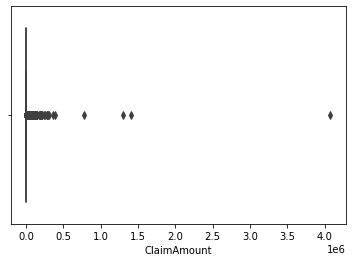

In [23]:
#Boxplot before Removing the Outliers
sns.boxplot(df['ClaimAmount'])
plt.show()

In [24]:
# Eliminate the outlier in 'CSinMPa' and write data to new file

ClaimAmount_UL = round(df.ClaimAmount.mean() + 3 * df.ClaimAmount.std(),3)
ClaimAmount_LL = round(df.ClaimAmount.mean() - 3 * df.ClaimAmount.std(),3)
df_new = df[(df.ClaimAmount > ClaimAmount_LL) & (df.ClaimAmount< ClaimAmount_UL)]
df_bk = df_new
df_new.shape

(678999, 14)

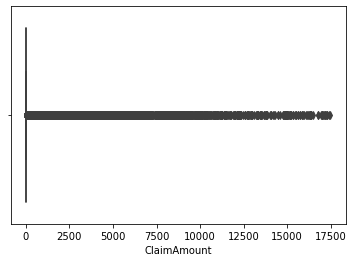

In [25]:
#After Eliminating the Outliers
sns.boxplot(df_new['ClaimAmount'])
plt.show()

In [33]:
#Display the Columns in the DataSet
type(df_new)

pandas.core.frame.DataFrame

In [27]:
#Apply the OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
Col=['VehBrand','VehGas']
df_new=pd.get_dummies(df_new,columns=Col)

In [28]:
#Apply the LabelEncoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Area'] = LE.fit_transform(df[['Area']])
df_new['Region'] = LE.fit_transform(df_new[['Region']])
df_new.head()

,IDpol,ClaimAmount,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,Density,...,VehBrand_B12,VehBrand_B13,VehBrand_B14,VehBrand_B2,VehBrand_B3,VehBrand_B4,VehBrand_B5,VehBrand_B6,VehGas_Diesel,VehGas_Regular
0,1,0,1,0.10,D,5,0,55,50,1217,...,1,0,0,0,0,0,0,0,0,1
1,3,0,1,0.77,D,5,0,55,50,1217,...,1,0,0,0,0,0,0,0,0,1
2,5,0,1,0.75,B,6,2,52,50,54,...,1,0,0,0,0,0,0,0,1,0
3,10,0,1,0.09,B,7,0,46,50,76,...,1,0,0,0,0,0,0,0,1,0
4,11,0,1,0.84,B,7,0,46,50,76,...,1,0,0,0,0,0,0,0,1,0


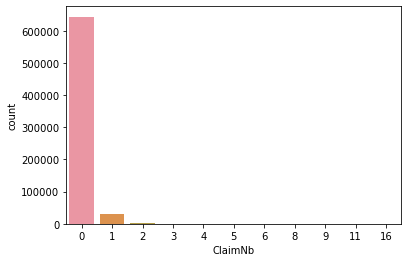

In [29]:
#BarPlotWithRespective To No.of Claims 
sns.countplot(x='ClaimNb',data=df_new)
plt.show()

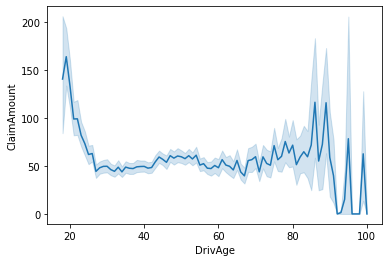

In [30]:
#Plot the Line Plot Witherespective to DriverAge and ClaimAmount
sns.lineplot(x='DrivAge',y='ClaimAmount',data=df_new)
plt.show()

The data to be plotted:

[[41 64 41 24 15 89 45 17 27 37]
 [58 11 94 89 93 46 98  2 20 21]
 [32 74 88 79 65 49 32 62 56 11]
 [67 10 47  1 49 52 35 67 78 62]
 [83  4 98 49 26 27 17 41 34 33]
 [83 54 89 32 12  3 87 64 41 36]
 [62  6  4  3 55 80  6 85 70 47]
 [37 23 95 15 45 14 64 44 87 44]
 [18 69 30 20 15 44 98 59 66 84]
 [66 90 64 40 25 10 12  3 75 38]]


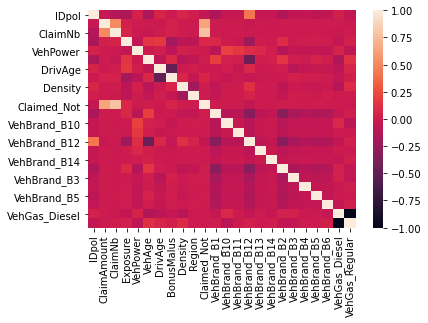

In [32]:
data = np.random.randint(low = 1,
                         high = 100,
                         size = (10, 10))
print("The data to be plotted:\n")
print(data)
  
# plotting the heatmap
hm = sns.heatmap(df_new.corr())
  
# displaying the plotted heatmap
plt.show()

In [33]:
#Remove the Unwanted Columns in the DataSet
del df_new['IDpol']

In [34]:
#Change the DataType 
df_new['Exposure']=df_new['Exposure'].astype(int)
df_new['ClaimAmount']=df_new['ClaimAmount'].astype(int)
df_new['Area'] = LE.fit_transform(df_new[['Area']])

In [35]:
#Display the DataSet
df_new

,ClaimAmount,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,Density,Region,...,VehBrand_B12,VehBrand_B13,VehBrand_B14,VehBrand_B2,VehBrand_B3,VehBrand_B4,VehBrand_B5,VehBrand_B6,VehGas_Diesel,VehGas_Regular
0,0,1,0,3,5,0,55,50,1217,17,...,1,0,0,0,0,0,0,0,0,1
1,0,1,0,3,5,0,55,50,1217,17,...,1,0,0,0,0,0,0,0,0,1
2,0,1,0,1,6,2,52,50,54,2,...,1,0,0,0,0,0,0,0,1,0
3,0,1,0,1,7,0,46,50,76,14,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,1,7,0,46,50,76,14,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683194,0,0,0,4,4,0,54,50,3317,20,...,1,0,0,0,0,0,0,0,0,1
683195,0,0,0,4,4,0,41,95,9850,0,...,1,0,0,0,0,0,0,0,0,1
683196,0,0,0,3,6,2,45,50,1323,17,...,1,0,0,0,0,0,0,0,1,0
683197,0,0,0,1,4,0,60,50,95,6,...,1,0,0,0,0,0,0,0,0,1


In [37]:
#Check the Datatypes 
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678999 entries, 0 to 683198
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   ClaimAmount     678999 non-null  int32
 1   ClaimNb         678999 non-null  int64
 2   Exposure        678999 non-null  int32
 3   Area            678999 non-null  int32
 4   VehPower        678999 non-null  int64
 5   VehAge          678999 non-null  int64
 6   DrivAge         678999 non-null  int64
 7   BonusMalus      678999 non-null  int64
 8   Density         678999 non-null  int64
 9   Region          678999 non-null  int32
 10  Claimed_Not     678999 non-null  int64
 11  VehBrand_B1     678999 non-null  uint8
 12  VehBrand_B10    678999 non-null  uint8
 13  VehBrand_B11    678999 non-null  uint8
 14  VehBrand_B12    678999 non-null  uint8
 15  VehBrand_B13    678999 non-null  uint8
 16  VehBrand_B14    678999 non-null  uint8
 17  VehBrand_B2     678999 non-null  uint8
 18  VehB

In [38]:
#Seperate the Independent Variable And Target Variable
IndepVar = []
for col in df_new.columns:
    if col != 'Claimed_Not':
        IndepVar.append(col)

TargetVar = 'Claimed_Not'

x = df_new[IndepVar]
y = df_new[TargetVar]

In [39]:
#Split the Data into x_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [40]:
#Apply the Standardization
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test= scalar.transform(x_test)

In [41]:
#Load the Files to Save the Results
EMResults=pd.read_csv(r"C:\Users\eswar\OneDrive\Desktop\Internship-AIMLDS\resultfileknnalgorithmswithknnresultfile\EMResults.csv")
HTResults=pd.read_csv(r"C:\Users\eswar\OneDrive\Desktop\Internship-AIMLDS\resultfileknnalgorithmswithknnresultfile\HTResults.csv")

Confusion matrix : 
 [[  7825      0]
 [     0 195875]]
Outcome values : 
 7825 0 0 195875
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      7825
           0       1.00      1.00      1.00    195875

    accuracy                           1.00    203700
   macro avg       1.00      1.00      1.00    203700
weighted avg       1.00      1.00      1.00    203700

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 1.0
roc_auc_score: 1.0


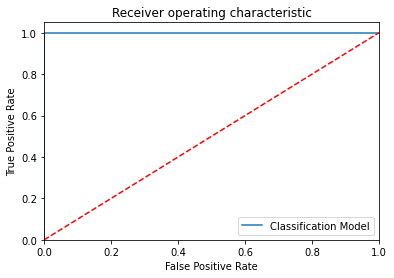

-----------------------------------------------------------------------------------------------------


In [42]:
# To build the 'RandomForestClassifier' model with random sampling

from sklearn.ensemble import RandomForestClassifier

ModelRF1 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                                  n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                                  ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelRF1.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF1.predict(x_test)
y_pred_prob = ModelRF1.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelRF1,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(actual, predicted),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

Model Name:  LogisticRegression()
Confusion matrix : 
 [[  7712    113]
 [    33 195842]]
Outcome values : 
 7712 113 33 195842
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      0.99      7825
           0       1.00      1.00      1.00    195875

    accuracy                           1.00    203700
   macro avg       1.00      0.99      1.00    203700
weighted avg       1.00      1.00      1.00    203700

Accuracy : 99.9 %
Precision : 99.6 %
Recall : 98.6 %
F1 Score : 0.991
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.3 %
MCC : 0.99
roc_auc_score: 0.993


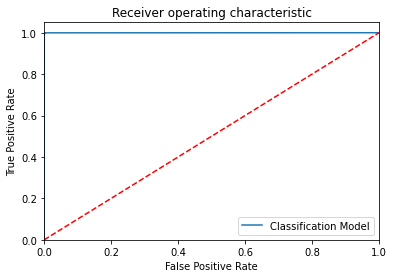

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[  7825      0]
 [     0 195875]]
Outcome values : 
 7825 0 0 195875
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      7825
           0       1.00      1.00      1.00    195875

    accuracy                           1.00    203700
   macro avg       1.00      1.00      1.00    203700
weighted avg       1.00      1.00      1.00    203700

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 1.0
roc_auc_score: 1.0


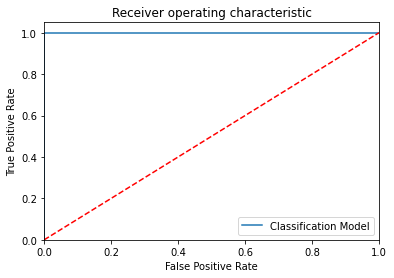

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[  7825      0]
 [     0 195875]]
Outcome values : 
 7825 0 0 195875
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      7825
           0       1.00      1.00      1.00    195875

    accuracy                           1.00    203700
   macro avg       1.00      1.00      1.00    203700
weighted avg       1.00      1.00      1.00    203700

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 1.0
roc_auc_score: 1.0


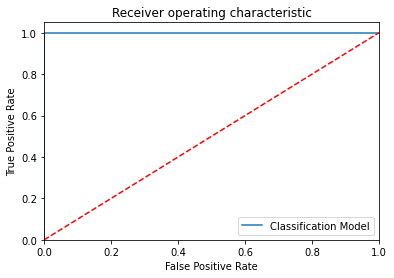

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[  7770     55]
 [   114 195761]]
Outcome values : 
 7770 55 114 195761
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99      7825
           0       1.00      1.00      1.00    195875

    accuracy                           1.00    203700
   macro avg       0.99      1.00      0.99    203700
weighted avg       1.00      1.00      1.00    203700

Accuracy : 99.9 %
Precision : 98.6 %
Recall : 99.3 %
F1 Score : 0.989
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 99.6 %
MCC : 0.989
roc_auc_score: 0.996


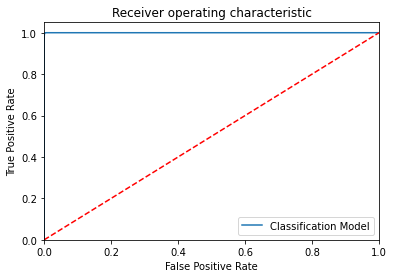

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  7298    527]
 [   288 195587]]
Outcome values : 
 7298 527 288 195587
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.93      0.95      7825
           0       1.00      1.00      1.00    195875

    accuracy                           1.00    203700
   macro avg       0.98      0.97      0.97    203700
weighted avg       1.00      1.00      1.00    203700

Accuracy : 99.6 %
Precision : 96.2 %
Recall : 93.3 %
F1 Score : 0.947
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 96.6 %
MCC : 0.945
roc_auc_score: 0.966


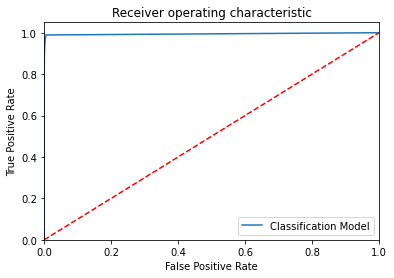

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[  7825      0]
 [  2682 193193]]
Outcome values : 
 7825 0 2682 193193
Classification report : 
               precision    recall  f1-score   support

           1       0.74      1.00      0.85      7825
           0       1.00      0.99      0.99    195875

    accuracy                           0.99    203700
   macro avg       0.87      0.99      0.92    203700
weighted avg       0.99      0.99      0.99    203700

Accuracy : 98.7 %
Precision : 74.5 %
Recall : 100.0 %
F1 Score : 0.854
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 99.3 %
MCC : 0.857
roc_auc_score: 0.993


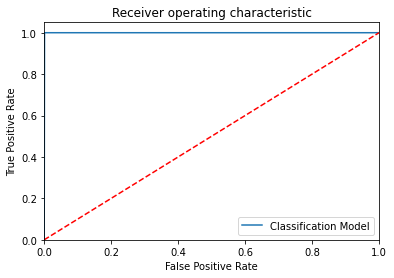

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[  7601    224]
 [    53 195822]]
Outcome values : 
 7601 224 53 195822
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.97      0.98      7825
           0       1.00      1.00      1.00    195875

    accuracy                           1.00    203700
   macro avg       1.00      0.99      0.99    203700
weighted avg       1.00      1.00      1.00    203700

Accuracy : 99.9 %
Precision : 99.3 %
Recall : 97.1 %
F1 Score : 0.982
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 98.6 %
MCC : 0.981
roc_auc_score: 0.986


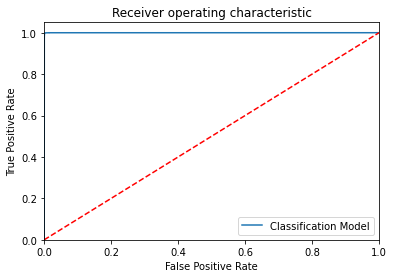

-----------------------------------------------------------------------------------------------------


In [43]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from xgboost import XGBClassifier
# import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)
#ModelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
#ModelLGB = lgb.LGBMClassifier()

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #---

In [44]:
#Dipsplay the Results
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),7712,113,33,195842,0.999,0.996,0.986,0.991,1.000,0.990,0.992695,0.993
1,DecisionTreeClassifier(),7825,0,0,195875,1.000,1.000,1.000,1.000,1.000,1.000,1.000000,1.000
2,"(DecisionTreeClassifier(max_features='sqrt', r...",7825,0,0,195875,1.000,1.000,1.000,1.000,1.000,1.000,1.000000,1.000
3,"(ExtraTreeClassifier(random_state=542695385), ...",7770,55,114,195761,0.999,0.986,0.993,0.989,0.999,0.989,0.996195,0.996
4,KNeighborsClassifier(),7298,527,288,195587,0.996,0.962,0.933,0.947,0.999,0.945,0.965591,0.966
5,GaussianNB(),7825,0,2682,193193,0.987,0.745,1.000,0.854,0.986,0.857,0.993154,0.993
6,SVC(probability=True),7601,224,53,195822,0.999,0.993,0.971,0.982,1.000,0.981,0.985552,0.986
